#Machine Learning With Python: Linear Regression With One Variable

**Sample problem of predicting home price in monroe, new jersey (USA)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df=pd.read_csv('/content/homeprices(linear regression).csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


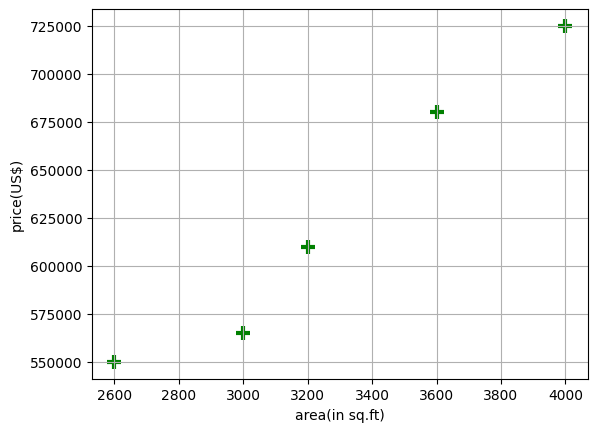

In [ ]:
plt.xlabel('area(in sq.ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='green',marker='+',s=100,linewidths=3)
plt.grid(True)

** Predict price of a home with area = 3300 sqr ft**

In [ ]:
reg=linear_model.LinearRegression() #creating a object with name LinearRegression()
reg.fit(df[['area']],df.price) #1st argument should be in 2D array as x axis and second is for y axis

LinearRegression()

In the code I provided, the reason for reshaping the input using **np.array().reshape(-1, 1)** is to ensure that the input is in the correct format expected by the predict method of the LinearRegression model. The **predict method expects a 2D array**-like input where each row corresponds to a data point and each column corresponds to a feature. In your case, **you have a single feature** (the 'area' variable) and want to predict the price for a single data point, **which is why you need to reshape the input.**

Here's a breakdown of what's happening:

**np.array([[3300]])**: This creates a NumPy array with a single element, 3300, which is the value you want to use for prediction.

**.reshape(-1, 1)**: This reshapes the 1D array into a 2D array with one column and as many rows as necessary. The -1 is a placeholder that tells NumPy to automatically determine the number of rows needed to maintain the data's integrity.

By reshaping the input, you're essentially telling the model that you have one data point with one feature, which is the 'area'. This conforms to the 2D array-like input format required by the predict method and prevents any shape-related errors.

In [ ]:
reg.predict(np.array([[3300]]).reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [ ]:
reg.coef_  #coef=m i.e slope

array([135.78767123])

In [ ]:
reg.intercept_  #intercept=b i.e y=mx+b

180616.43835616432

In [ ]:
#y=mx+b....This will give 'y
135.78767123*3300+180616.43835616432

628715.7534151643

**As we can see above that we are getting the same answer in both i.e in reg.predict and the approach that how we get this prediction**

**Predict price of a home with area = 5000 sqr ft**

In [ ]:
reg.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

#Generate CSV file with list of home price predictions

In [ ]:
area_df = pd.read_csv("/content/areas(linear regression).csv")
area_df.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [ ]:
p=reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [ ]:
area_df['prices']=p # here it will make a new column name prices and predicted prices will be printed in prices column
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [ ]:
area_df.to_csv("prediction(linear regression).csv")